In [1]:
import os
import pickle
import matplotlib.pyplot as plt
filename = 'level_0_step_1_latent_0_prompt_1.pkl'

if os.path.exists(filename):
    with open(filename, 'rb') as f:
        tr = pickle.load(f)
    print("File loaded successfully.")
else:
    print("File does not exist.")


File loaded successfully.


In [2]:
import pandas as pd

# Define column names
columns = ['Level', 'Step', 'Latent', 'Prompt','RMSE_valid', 'MAE_valid', 'MAPE_valid', 'R^2_valid', 'RMSE_test', 'MAE_test', 'MAPE_test', 'R^2_test', 'data', 'pred']

# Create an empty DataFrame
df = pd.DataFrame(columns=columns)

print(df)

Empty DataFrame
Columns: [Level, Step, Latent, Prompt, RMSE_valid, MAE_valid, MAPE_valid, R^2_valid, RMSE_test, MAE_test, MAPE_test, R^2_test, data, pred]
Index: []


In [3]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
def analyze_data(data):
    data_test = data['data'][-50:-25]
    data_pred = data['pred'][-50:-25]

    r2_valid = r2_score(data_test, data_pred)
    mae_valid = mean_absolute_error(data_test, data_pred)
    rmse_valid = (mean_squared_error(data_test, data_pred))**0.5
    mape_valid = np.mean(np.abs((np.array(data_test) - np.array(data_pred)) / np.array(data_test))) * 100


    data_test = data['data'][-25:]
    data_pred = data['pred'][-25:]

    r2_test = r2_score(data_test, data_pred)
    mae_test = mean_absolute_error(data_test, data_pred)
    rmse_test = mean_squared_error(data_test, data_pred)**0.5
    mape_test = np.mean(np.abs((np.array(data_test) - np.array(data_pred)) / np.array(data_test))) * 100
    return rmse_valid, mae_valid, mape_valid, r2_valid, rmse_test, mae_test, mape_test, r2_test
analyze_data(tr)

(1385.6126442841087,
 859.28,
 23.10341808408723,
 0.9310638310861222,
 5673.099565493276,
 1703.8,
 44.81806913345525,
 0.046029040528681064)

In [6]:
pred_length = 50
levels = [0,1,2,3]
prompts = [1,2,3,4,5]
steps = [1,2,5,10]
latents = [0,1,2,3]
for level in levels:
    for step in steps:
        for latent in latents:
            for prompt in prompts:
                filename = f'level_{level}_step_{step}_latent_{latent}_prompt_{prompt}.pkl'
                if os.path.exists(filename):
                    with open(filename, 'rb') as f:
                        data_dict = pickle.load(f)
                        stats = analyze_data(data_dict)
                        new_row = {
                                    'Level': level,
                                    'Step': step,
                                    'Latent': latent,
                                    'Prompt': prompt,
                            
                                    'RMSE_valid':stats[0],
                                    'MAE_valid':stats[1],
                                    'MAPE_valid':stats[2],
                                    'R^2_valid': stats[3],
                                    'RMSE_test':stats[4],
                                    'MAE_test':stats[5],
                                    'MAPE_test':stats[6],
                                    'R^2_test': stats[7],
                                    'data':data_dict['data'],
                                    'pred': data_dict['pred']
                            }
                        df.loc[len(df)] = new_row

In [7]:
data_tmp = df['data'][0]
data_tmp

[698.0,
 921.0,
 1190.0,
 1736.0,
 2428.0,
 3409.0,
 4750.0,
 6342.0,
 7754.0,
 9212.0,
 6798.0,
 5194.0,
 3985.0,
 2673.0,
 2022.0,
 1542.0,
 971.0,
 565.0,
 397.0,
 340.0,
 201.0,
 100.0,
 91.0,
 84.0,
 71.0,
 50.0,
 44.0,
 47.0,
 45.0,
 60.0,
 81.0,
 56.0,
 57.0,
 96.0,
 118.0,
 105.0,
 139.0,
 180.0,
 185.0,
 216.0,
 200.0,
 263.0,
 287.0,
 338.0,
 432.0,
 547.0,
 634.0,
 874.0,
 1192.0,
 2136.0,
 3619.0,
 6009.0,
 6421.0,
 7224.0,
 8396.0,
 8761.0,
 10456.0,
 12771.0,
 12248.0,
 11226.0,
 7164.0,
 5953.0,
 4743.0,
 4099.0,
 3030.0,
 1838.0,
 1129.0,
 724.0,
 468.0,
 342.0,
 334.0,
 285.0,
 227.0,
 211.0,
 174.0,
 183.0,
 152.0,
 139.0,
 114.0,
 127.0,
 121.0,
 114.0,
 145.0,
 125.0,
 102.0,
 142.0,
 203.0,
 247.0,
 265.0,
 243.0,
 285.0,
 369.0,
 413.0,
 465.0,
 570.0,
 791.0,
 1034.0,
 1402.0,
 1869.0,
 2411.0,
 3610.0,
 6223.0,
 11987.0,
 15294.0,
 16672.0,
 18948.0,
 17965.0,
 19961.0,
 18270.0,
 16732.0,
 13401.0,
 8575.0,
 5251.0,
 3477.0,
 2839.0,
 2387.0,
 2068.0,
 1422.0,


In [33]:
df[(df['Level'] == 0) & (df['Prompt'].isin([1, 4, 5])) & (df['Latent'].isin([2,3]))].to_csv('test_test.csv')

# GPT 5

In [14]:
import pandas as pd

# Define column names
columns = ['Level', 'Step', 'Latent', 'Prompt', 'Model', 'RMSE_valid', 'MAE_valid', 'MAPE_valid', 'R^2_valid', 'RMSE_test', 'MAE_test', 'MAPE_test', 'R^2_test', 'data', 'pred']

# Create an empty DataFrame
df = pd.DataFrame(columns=columns)

print(df)

Empty DataFrame
Columns: [Level, Step, Latent, Prompt, Model, RMSE_valid, MAE_valid, MAPE_valid, R^2_valid, RMSE_test, MAE_test, MAPE_test, R^2_test, data, pred]
Index: []


In [15]:
pred_length = 50
levels = [0]
prompts = [1]
steps = [1,2,5]
latents = [2]
model_nums = [0,1]
for level in levels:
    for step in steps:
        for latent in latents:
            for prompt in prompts:
                for model_num in model_nums:
                    filename = f'level_{level}_step_{step}_latent_{latent}_prompt_{prompt}_model_{model_num}_gpt5.pkl'
                    if os.path.exists(filename):
                        with open(filename, 'rb') as f:
                            data_dict = pickle.load(f)
                            stats = analyze_data(data_dict)
                            new_row = {
                                        'Level': level,
                                        'Step': step,
                                        'Latent': latent,
                                        'Prompt': prompt,
                                        'Model':model_num,
                                        'RMSE_valid':stats[0],
                                        'MAE_valid':stats[1],
                                        'MAPE_valid':stats[2],
                                        'R^2_valid': stats[3],
                                        'RMSE_test':stats[4],
                                        'MAE_test':stats[5],
                                        'MAPE_test':stats[6],
                                        'R^2_test': stats[7],
                                        'data':data_dict['data'],
                                        'pred': data_dict['pred']
                                }
                            df.loc[len(df)] = new_row

In [14]:
df.to_csv('test_gpt5.csv')
dataset_index = pd.read_csv('dataset_index.csv')
dataset_index['Date'] = str(dataset_index['Year'] + dataset_index['Week'])
dataset_index['Date'] = dataset_index['Year'].astype(str) + '-' + dataset_index['Week'].astype(str).str.zfill(2)
dataset_index
index_list = dataset_index['Date'].tolist()


In [20]:
print(index_list[:3])
print(data_tmp[:3])

['2016-01', '2016-02', '2016-03']
[698.0, 921.0, 1190.0]


In [21]:
index_list[-48:-45]

['2024-05', '2024-06', '2024-07']

In [22]:
data_tmp[-48:-45]

[14753.0, 13356.0, 12147.0]

,Level,Step,Latent,Prompt,Model,RMSE_valid,MAE_valid,MAPE_valid,R^2_valid,RMSE_test,MAE_test,MAPE_test,R^2_test,data,pred
4,0,5,2,1,0,2734.496144,1793.560,33.197080,0.731516,4954.677422,2080.440,40.297317,0.272346,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[16890.0, 17430.0, 17910.0, 18420.0, 18950.0, ..."
5,0,5,2,1,1,1121.166936,783.328,21.193823,0.954866,2144.293957,909.476,21.030406,0.863710,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[14818.0, 13794.0, 12850.0, 11962.0, 11144.0, ..."


gpt-4o-mini
2734.496143716425
gpt-5-mini
1121.166936009085


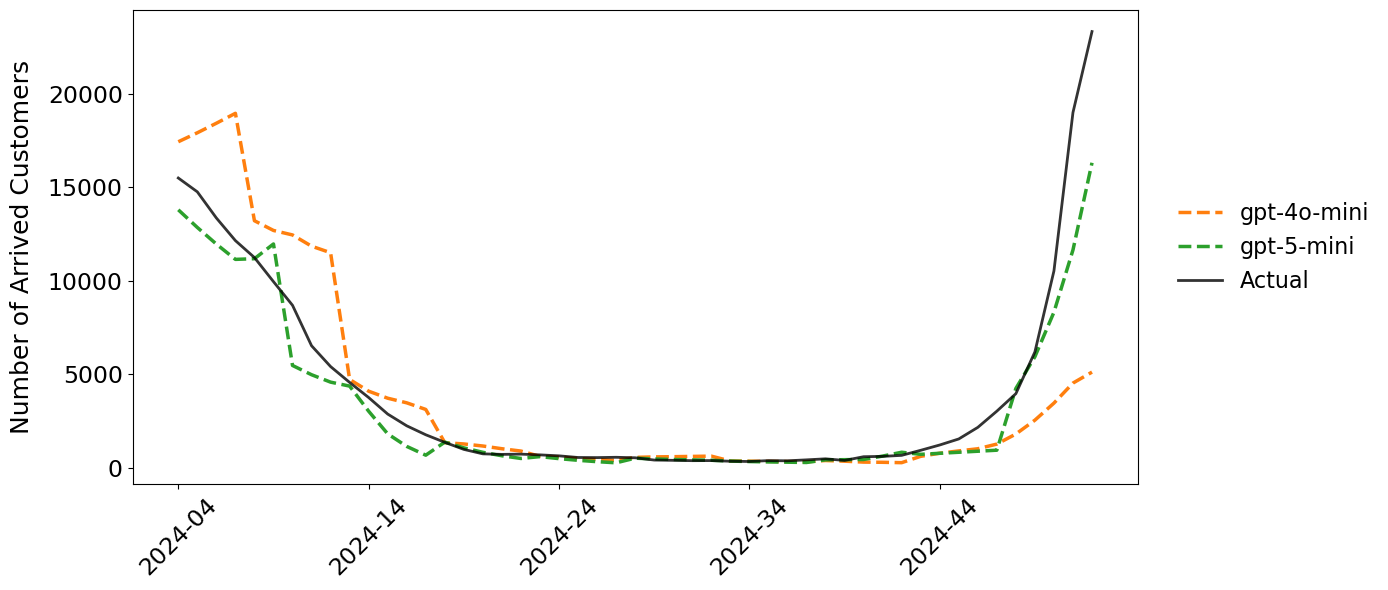

In [19]:
import matplotlib.pyplot as plt
import numpy as np

step = 5
level = 0
latent = 2
df_filtered = df[(df['Step']==step) & (df['Level']==level) & (df['Prompt'].isin([1,2,3])) & (df['Latent']==latent)]

label_list = ['gpt-4o-mini', 'gpt-5-mini']
color_list = ['#ff7f0e', '#2ca02c']  # Blue, Orange, Green, Red
line_styles = ['-', '--']
line_styles = ['--', '--']

display(df_filtered)
plt.figure(figsize=(14, 6))

x_vals = index_list[-49:]
tick_step = 10
tick_positions = x_vals[::tick_step]

plotted_labels = set()

# Plot predictions
for index, row in df_filtered.iterrows():
    
    prompt = row['Model']
    y_pred = row['pred'][-49:]
    label = label_list[prompt]

    # Only label each line once
    plot_label = label if label not in plotted_labels else None
    plotted_labels.add(label)
    print(plot_label)
    print(row['RMSE_valid'])
    plt.plot(x_vals, y_pred,
             label=plot_label,
             color=color_list[prompt],
             linestyle=line_styles[prompt % len(line_styles)],
             linewidth=2.5)

# Plot actual values
y_data = df_filtered.iloc[0]['data'][-49:]
plt.plot(x_vals, y_data,
         label='Actual',
         color='black',
         linestyle='solid',
         linewidth=2,
         alpha=0.8)

# Axis formatting
plt.xticks(tick_positions, fontsize=17, rotation=45)
plt.yticks(fontsize=17)
plt.ylabel('Number of Arrived Customers', fontsize=18, labelpad=10)
# plt.grid(True, linestyle='--', alpha=0.4)

# Legend
plt.legend(
    fontsize=16,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)
plt.tight_layout()
plt.savefig(f'fig_level_{level}_step_{step}_latent_{latent}_model_gpt.png', dpi=300)
plt.show()


# plot for inf_a

In [6]:
dataset_index = pd.read_csv('dataset_index.csv')
dataset_index['Date'] = str(dataset_index['Year'] + dataset_index['Week'])
dataset_index['Date'] = dataset_index['Year'].astype(str) + '-' + dataset_index['Week'].astype(str).str.zfill(2)
dataset_index

,Unnamed: 0,Year,Week,Date
0,0,2016,1,2016-01
1,1,2016,2,2016-02
2,2,2016,3,2016-03
3,3,2016,4,2016-04
4,4,2016,5,2016-05
...,...,...,...,...
464,464,2024,48,2024-48
465,465,2024,49,2024-49
466,466,2024,50,2024-50
467,467,2024,51,2024-51


In [7]:
index_list = dataset_index['Date'].tolist()
level = 0
for step in steps:
    df_filtered = df[(df['Step']==step) & (df['Level']==level)]
df['RMSE'] = df['MSE']**0.5    

KeyError: 'MSE'

In [16]:
df[df['Prompt'].isin([1, 2, 3])]

,Level,Step,Latent,Prompt,MSE,MAE,MAPE,R^2,data,pred,RMSE
0,0,1,0,1,1.705199e+07,1281.54,33.960744,0.468031,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[15702.0, 14125.0, 14635.0, 13986.0, 13714.0, ...",4129.405592
1,0,1,0,2,2.194684e+07,1992.80,88.940450,0.315327,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[18461.0, 19500.0, 16280.0, 10420.0, 13608.0, ...",4684.745073
2,0,1,0,3,3.731881e+07,2090.64,81.543210,-0.164231,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[16063.0, 13356.0, 16364.0, 15133.0, 13989.0, ...",6108.911959
3,0,1,1,1,2.089707e+06,556.24,11.698983,0.934808,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[12435.0, 14145.0, 14215.0, 13665.0, 12148.0, ...",1445.582042
4,0,1,1,2,2.354938e+08,7018.30,1045.752448,-6.346676,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[19904.0, 11658.0, 13080.0, 13905.0, 13360.0, ...",15345.806948
...,...,...,...,...,...,...,...,...,...,...,...
81,2,5,3,1,1.061634e+07,1703.58,32.140398,0.668803,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[18890.0, 20000.0, 21000.0, 22000.0, 23000.0, ...",3258.272594
82,2,10,0,1,1.077159e+07,1497.12,40.796025,0.663960,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[16005.0, 15390.0, 14775.0, 14160.0, 13545.0, ...",3282.010311
83,2,10,1,1,2.098535e+07,1808.54,34.147683,0.345322,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[13200.0, 12575.0, 12100.0, 11500.0, 11000.0, ...",4580.977361
84,2,10,2,1,1.878087e+07,1696.04,32.567939,0.414095,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[15213.0, 14084.0, 12675.0, 11244.0, 10000.0, ...",4333.690658


In [7]:
df_filtered

,Level,Step,Latent,Prompt,MSE,MAE,MAPE,R^2,data,pred
41,0,10,0,1,2.581571e+07,2543.400,54.053717,0.194630,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[19434.0, 14453.0, 10341.0, 7595.0, 5731.0, 42..."
42,0,10,0,2,2.800601e+07,2658.420,67.762795,0.126299,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[13090.0, 15240.0, 14005.0, 15150.0, 16830.0, ..."
43,0,10,1,1,2.258307e+07,2224.620,56.809390,0.295478,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[13842.0, 11876.0, 10432.0, 9700.0, 8454.0, 73..."
44,0,10,1,2,7.903035e+08,16441.060,2732.297013,-23.655018,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[14721.0, 16807.0, 19809.0, 23048.0, 26000.0, ..."
45,0,10,1,3,7.904033e+07,6471.820,650.409950,-1.465813,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[18276.0, 19152.0, 20023.0, 20901.0, 21784.0, ..."
46,0,10,2,1,1.971890e+07,2130.860,85.407393,0.384831,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[15460.0, 14780.0, 14200.0, 13500.0, 13000.0, ..."
47,0,10,2,2,5.772846e+08,12084.780,1535.748652,-17.009490,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[17121.0, 13941.0, 12001.0, 11562.0, 11084.0, ..."
48,0,10,2,3,7.793771e+07,7315.260,632.602850,-1.431415,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[1581.0, 1343.0, 1025.0, 736.0, 526.0, 395.0, ..."
49,0,10,3,1,2.114684e+07,1715.140,29.079998,0.340284,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[14798.0, 13400.0, 12450.0, 11500.0, 10600.0, ..."
50,0,10,3,2,4.070782e+08,10737.676,515.321762,-11.699578,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[16513.0, 16425.0, 16368.0, 16291.0, 16170.0, ..."


In [13]:
step = 5
level = 0

df_filtered = df[(df['Step']==step) & (df['Level']==level) & (df['Prompt']==1)]


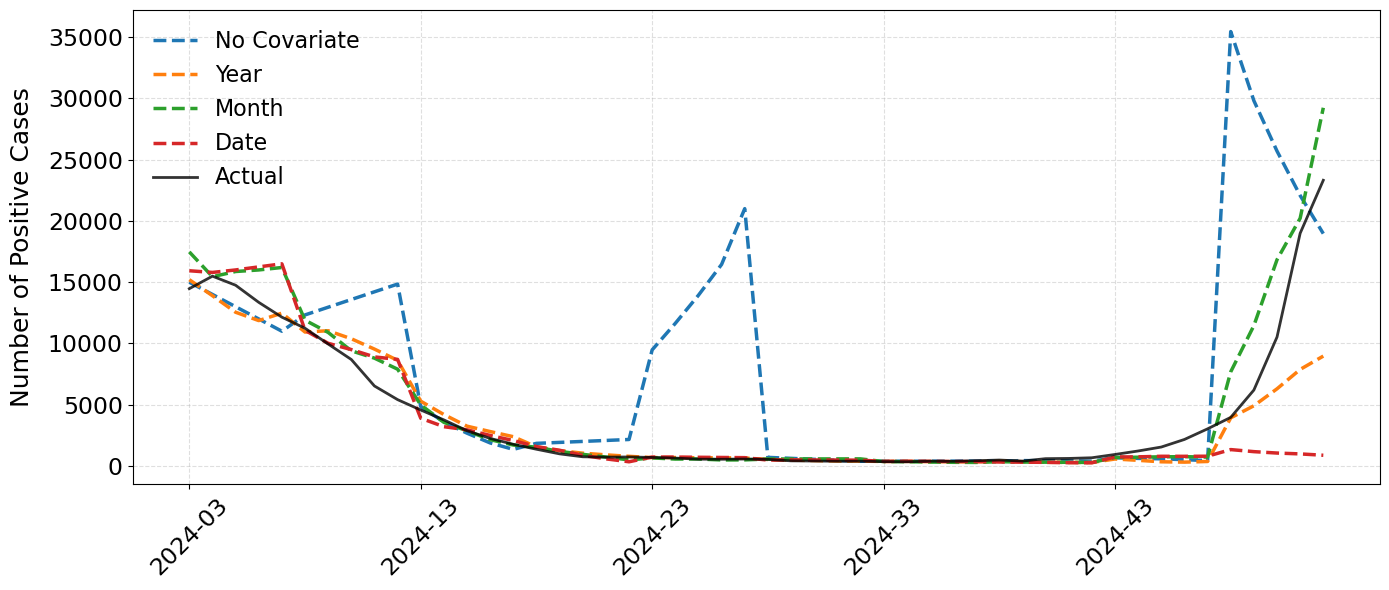

In [14]:
import matplotlib.pyplot as plt
import numpy as np

label_list = ['No Covariate', 'Year', 'Month', 'Date']
color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red
line_styles = ['-', '--', '-.', ':']
line_styles = ['--', '--', '--', '--']


plt.figure(figsize=(14, 6))

x_vals = index_list[-50:]
tick_step = 10
tick_positions = x_vals[::tick_step]

plotted_labels = set()

# Plot predictions
for index, row in df_filtered.iterrows():
    latent = row['Latent']
    y_pred = row['pred'][-50:]
    label = label_list[latent]

    # Only label each line once
    plot_label = label if label not in plotted_labels else None
    plotted_labels.add(label)

    plt.plot(x_vals, y_pred,
             label=plot_label,
             color=color_list[latent],
             linestyle=line_styles[latent % len(line_styles)],
             linewidth=2.5)

# Plot actual values
y_data = df_filtered.iloc[0]['data'][-50:]
plt.plot(x_vals, y_data,
         label='Actual',
         color='black',
         linestyle='solid',
         linewidth=2,
         alpha=0.8)

# Axis formatting
plt.xticks(tick_positions, fontsize=17, rotation=45)
plt.yticks(fontsize=17)
plt.ylabel('Number of Positive Cases', fontsize=18, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.4)

# Legend
plt.legend(fontsize=16, loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig(f'fig_level_{level}_step_{step}.png', dpi=300)
plt.show()


In [54]:
df_table = df.drop(['data', 'pred', 'MSE'], axis=1)
df_table = df_table[(df_table['Level']==0) & (df_table['Prompt']==1)]

In [55]:
# df_table.to_csv('table.csv')

In [56]:
# df_table

# Prompt

In [19]:
step = 5
level = 0
latent = 2
df_filtered = df[(df['Step']==step) & (df['Level']==level) & (df['Latent']==latent)]
df_filtered

,Level,Step,Latent,Prompt,RMSE_valid,MAE_valid,MAPE_valid,R^2_valid,RMSE_test,MAE_test,MAPE_test,R^2_test,data,pred
33,0,5,2,1,1374.717236,792.20,13.849713,0.932144,2250.019262,1197.32,39.669773,0.849939,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[17473.0, 15448.0, 15872.0, 16000.0, 16200.0, ..."
34,0,5,2,2,3975.823653,3029.48,267.342176,0.432432,14610.377194,9575.44,1070.365634,-5.327282,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[15538.0, 16477.0, 17476.0, 18491.0, 19545.0, ..."
35,0,5,2,3,6835.683310,5371.36,525.503280,-0.677750,8875.645840,7188.44,946.632494,-1.335040,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[16238.0, 15987.0, 15234.0, 14789.0, 14456.0, ..."


33
34
35


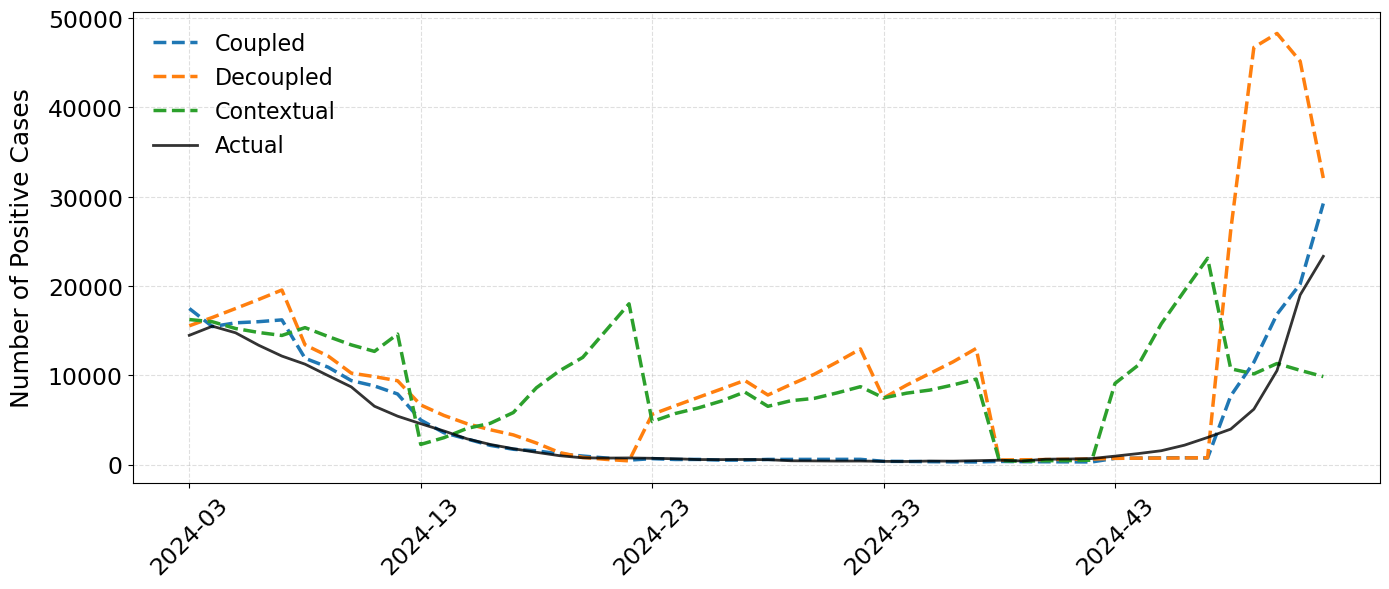

In [20]:
import matplotlib.pyplot as plt
import numpy as np

label_list = ['Coupled', 'Decoupled', 'Contextual']
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
line_styles = ['--', '--', '--']  # Match the first function: all dashed

plt.figure(figsize=(14, 6))  # Match first function's size

x_vals = index_list[-50:]
tick_step = 10
tick_positions = x_vals[::tick_step]

plotted_labels = set()
iter_count = 0
# Plot predictions
for index, row in df_filtered.iterrows():
    print(index)
    latent = row['Latent']
    y_pred = row['pred'][-50:]
    label = label_list[iter_count]

    # Avoid duplicate labels
    plot_label = label if label not in plotted_labels else None
    plotted_labels.add(label)
    
    plt.plot(x_vals, y_pred,
             label=plot_label,
             color=custom_colors[iter_count],
             linestyle=line_styles[iter_count],
             linewidth=2.5)
    iter_count += 1
    if iter_count==3:
        break
# Plot actual values
y_data = df_filtered.iloc[0]['data'][-50:]
plt.plot(x_vals, y_data,
         label='Actual',
         color='black',
         linestyle='solid',
         linewidth=2,
         alpha=0.8)

# Axis formatting (matching the first function)
plt.xticks(tick_positions, fontsize=17, rotation=45)
plt.yticks(fontsize=17)
plt.ylabel('Number of Positive Cases', fontsize=18, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.4)

# Legend (matching upper right and style)
plt.legend(fontsize=16, loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig(f'fig_level_{level}_step_{step}_prompt.png', dpi=300)
plt.show()


# Prompt 2 -Appendix

In [29]:
step = 1
level = 0
latent_list = 2  # Example list of latent values
prompt_list = [1,4,5]
df_filtered = df[
    (df['Step'] == step) &
    (df['Level'] == level) &
    (df['Latent']==latent_list)&
    (df['Prompt'].isin(prompt_list))
]
df_filtered

,Level,Step,Latent,Prompt,RMSE_valid,MAE_valid,MAPE_valid,R^2_valid,RMSE_test,MAE_test,MAPE_test,R^2_test,data,pred
6,0,1,2,1,768.25993,505.08,10.379557,0.978808,1682.171751,592.28,13.776699,0.916125,"[698.0, 921.0, 1190.0, 1736.0, 2428.0, 3409.0,...","[15493.0, 12995.0, 15820.0, 14412.0, 13152.0, ..."


6


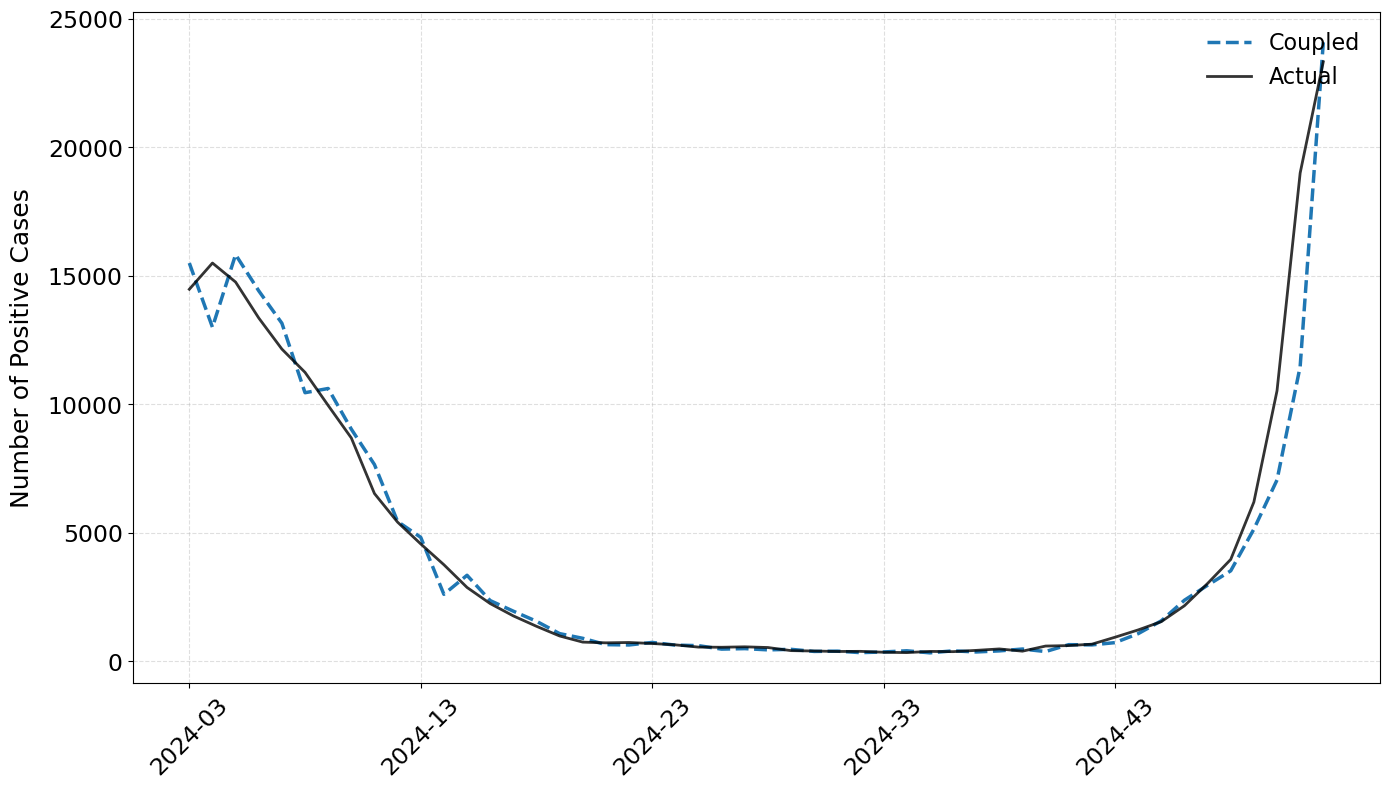

In [28]:
import matplotlib.pyplot as plt
import numpy as np

label_list = ['Coupled', 'PromptCast', 'Knowledge-Guided Prompt']
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
line_styles = ['--', '--', '--']  # Match the first function: all dashed

plt.figure(figsize=(14, 8))  # Match first function's size

x_vals = index_list[-50:]
tick_step = 10
tick_positions = x_vals[::tick_step]

plotted_labels = set()
iter_count = 0
# Plot predictions
for index, row in df_filtered.iterrows():
    print(index)
    latent = row['Latent']
    y_pred = row['pred'][-50:]
    label = label_list[iter_count]

    # Avoid duplicate labels
    plot_label = label if label not in plotted_labels else None
    plotted_labels.add(label)
    
    plt.plot(x_vals, y_pred,
             label=plot_label,
             color=custom_colors[iter_count],
             linestyle=line_styles[iter_count],
             linewidth=2.5)
    iter_count += 1
    if iter_count==3:
        break
# Plot actual values
y_data = df_filtered.iloc[0]['data'][-50:]
plt.plot(x_vals, y_data,
         label='Actual',
         color='black',
         linestyle='solid',
         linewidth=2,
         alpha=0.8)

# Axis formatting (matching the first function)
plt.xticks(tick_positions, fontsize=17, rotation=45)
plt.yticks(fontsize=17)
plt.ylabel('Number of Positive Cases', fontsize=18, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.4)
# Legend (matching upper right and style)
plt.legend(fontsize=16, loc='upper right', frameon=False)

plt.tight_layout()
plt.savefig(f'fig_level_{level}_step_{step}_prompt_appendix.png', dpi=300)
plt.show()


In [149]:
df_filtered = df[
    (df['Level'] == level) &
    (df['Latent']==latent_list)&
    (df['Prompt'].isin(prompt_list))
]
df_filtered.to_csv('tab.csv')